# Walmart Data Analysis

* Case Study

    - I am a data analyst recently recruited by Walmart which has multiple retail stores nationwide. My task is to help the inventory managers with insights that could help them manage inventories – to match demand and supply. 
    - I have been assigned to conduct data analysis and develop data-driven recommendations for the inventory managers.
    - I have one (1) week to present my findings and recommendations to the managers.

        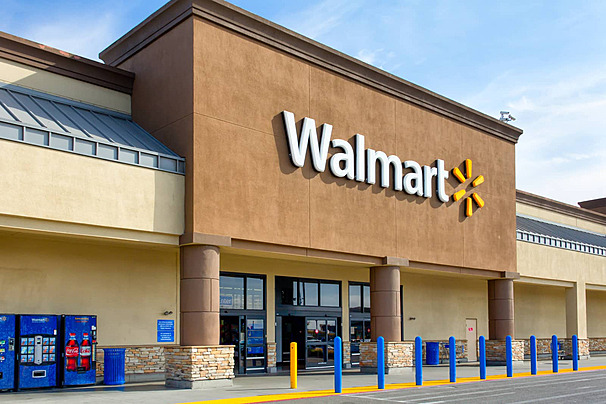


### Exploratory Data Analysis (EDA)

* Originally developed by American mathematician John Tukey in the 1970s, EDA is used to help look at the data before making any assumptions often employing data visualization methods. EDA has to do with making sense of the data by digging deep into the data to discover patterns, and anomalies, test hypotheses and check assumptions with the aid of graphical representations and summary statistics.
 
* Between 70% - 80% of the time is spent by Data Scientists and Analysts in performing EDA, it is the most important step and if not properly done could lead to faulty conclusions and recommendations.


### Importing the necessary packages.

In [1]:
# Import packages
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import warnings

# To ignore deprecation warnings
warnings.filterwarnings("ignore")

### Description of the Columns
* **Store:** *Store number*
* **Date:** *Week of sales.*
* **Weekly_Sales:** *Weekly sales for the given store.*
* **Holiday_Flag:** *Whether the week is a special holiday week or not (1 = holiday week; 0 = non-holiday week).*
* **Temperature:** *Average temperature in the region for the given week.*
* **Fuel_Price:** *Cost of fuel in the region for the given week.*
* **CPI:** *Consumer price index for the given week.*
* **Unemployment:** *Unemployment rate for the region for the given week.*


### Reading the CSV file and using .head() function to display the top 5 entries of the dataset.
 
* Analysis:
    
    1. Dataset has 8 colums.


In [2]:
# read CSV file by specifying the path
df = pd.read_csv("Walmart Data Analysis and Forcasting.csv")

# Show only the top 5 entries in the dataframe
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Using the .tail() function to display the buttom 5 entries.

* Analysis:

    1. Dataset has 6,435 column, observe that the columns start from 0.

In [3]:
# Show only the buttom 5 entries in the dataframe
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


### Using the python function .info() to display the dataframe information.

* Analysis:

    1. Five (5) columns have the datatype 'float'.

    2. Two (2) columns have the datatype 'Integer'.
    
    3. One (1) column has the datatype 'Object'.



In [4]:
# Show the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Converting the String(Object) to datetime datetype for the 'Date' Column

* Analysis

    1. Converting the 'Date' column to datetime format will permit me to carry out indepth EDA and feature engineering using the 'Date' column.

In [5]:
# Converting the Date column from String(Object) type to datetype format
df['Date'] = pd.to_datetime(df['Date'], format='mixed') 

# Show the column names along with the column's datatype
print(df.dtypes)

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


### Splitting the Day, Month and Year components from the 'Date' column 

In [6]:
# extract the day, month, and year components

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# show the modified data frame
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


### Checking the shape of the dataset.

* Analysis:

    1. The dataset contains 6,435 rows and 11 columns.

In [7]:
# Tuple showing the dimension of the dataframe
df.shape

(6435, 11)

### Using the .describe() function returns the the percentile, mean, and std of each column of the dataset.

    

In [8]:
# Displaying statistical data
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692307712,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.650350,6.475524,2010.965035
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,2012-03-02 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.753908,3.321797,0.797019


### To display the names of the columns in the dataset.

In [9]:
# Display the column labels of the DataFrame
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')

### Using the .isnull() function to check for missing values and summing the missing values using .sum() function.

* Analysis:

    1. There are no missing values in the dataset.

In [10]:
# Checking for the null values within the DataFrame
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

### Total weekly sales for each store.

* Analysis:

    1. At a glance, the Total weekly sales of each of the 45 Walmart Stores are displayed.

In [11]:
# Sum the Weekly Sales by grouping the stores and converting it from float to integer using the .astype(int) function
Total_weekly_sales = df.groupby('Store')['Weekly_Sales'].sum().astype(int)

# Print the result
print("Total Weekly Sales For each store: ", Total_weekly_sales)

Total Weekly Sales For each store:  Store
1     222402808
2     275382440
3      57586735
4     299543953
5      45475688
6     223756130
7      81598275
8     129951181
9      77789218
10    271617713
11    193962786
12    144287230
13    286517703
14    288999911
15     89133683
16     74252425
17    127782138
18    155114734
19    206634862
20    301397792
21    108117878
22    147075648
23    198750617
24    194016021
25    101061179
26    143416393
27    253855916
28    189263680
29     77141554
30     62716885
31    199613905
32    166819246
33     37160221
34    138249763
35    131520672
36     53412214
37     74202740
38     55159626
39    207445542
40    137870309
41    181341934
42     79565752
43     90565435
44     43293087
45    112395341
Name: Weekly_Sales, dtype: int32


### Average weekly sales for each store.

* Analysis:

    1. At a glance, the Average weekly sales of each of the 45 Walmart Stores are displayed.

In [12]:
# Average/mean of weekly sales by grouping the stores and converting the output from Float to Integer
Average_weekly_sales = df.groupby('Store')['Weekly_Sales'].mean().astype(int)

# Print the result
print("Average Weekly Sales For each store: ", Average_weekly_sales)

Average Weekly Sales For each store:  Store
1     1555264
2     1925751
3      402704
4     2094712
5      318011
6     1564728
7      570617
8      908749
9      543980
10    1899424
11    1356383
12    1009001
13    2003620
14    2020978
15     623312
16     519247
17     893581
18    1084718
19    1444999
20    2107676
21     756069
22    1028501
23    1389864
24    1356755
25     706721
26    1002911
27    1775216
28    1323522
29     539451
30     438579
31    1395901
32    1166568
33     259861
34     966781
35     919724
36     373511
37     518900
38     385731
39    1450668
40     964128
41    1268125
42     556403
43     633324
44     302748
45     785981
Name: Weekly_Sales, dtype: int32


### Total Weekly Sales for all Stores.

* Analysis:

    1. The Total Weekly Sales is 6,737,218,987.11 for all the 45 Walmart Stores.

In [13]:
# Sum the Weekly Sales of all stores
Total_sales_of_all_stores = df['Weekly_Sales'].sum()

# Print the result
print('Total Sales For all Stores: ', Total_sales_of_all_stores)

Total Sales For all Stores:  6737218987.11


### Average Sales for all Stores.

* Analysis:

    1. The Average Weekly Sales for all the 45 walmart stores is 1,046,964.88

In [14]:
# Average/Mean of Weekly Sales 
Average_sales_of_all_stores = df['Weekly_Sales'].mean()

# Print the result and round to 2 decimal places
print('Average Sales For all Stores: ', np.round(Average_sales_of_all_stores, decimals = 2))

Average Sales For all Stores:  1046964.88


### The Standard Deviation of the weekly sales for all stores.

* Analysis:

    1. The Standard deviation is 564,366.62 and this shows how far the number is from the mean or average.

In [15]:
# Standard Deviation of the Weekly Sales
Standard_deviation_of_weekly_sales = df['Weekly_Sales'].std()

# Print the output and round to 2 decimal places
print("Standard Deviation of Weekly Sales for all Stores: ", np.round(Standard_deviation_of_weekly_sales, decimals=2))

Standard Deviation of Weekly Sales for all Stores:  564366.62


### Store number with the MOST weekly sales.

* Analysis:

    1. The store with the most Weekly Sales is 'Store 20'.



In [16]:
Store_num_with_most_weekly_Sales = df.groupby('Store')['Weekly_Sales'].sum().idxmax()
print("Store with the most weekly sales: ", Store_num_with_most_weekly_Sales)

Store with the most weekly sales:  20


### Store number with the LEAST weekly sales.

* Analysis:

    1. The store with the Least weekly sales is 'Store 33'.

In [17]:
# Sum the weekly sales and group by store number
Store_num_with_least_weekly_Sales = df.groupby('Store')['Weekly_Sales'].sum().idxmin()

# Print the output
print("Store with the least weekly sales: ", Store_num_with_least_weekly_Sales)

Store with the least weekly sales:  33


### Plot of Weekly Sales by Store Number.

* Analysis:

    1. From the bar plot below, at a glance you can see the weekly sales performance of all 45 Walmart stores.



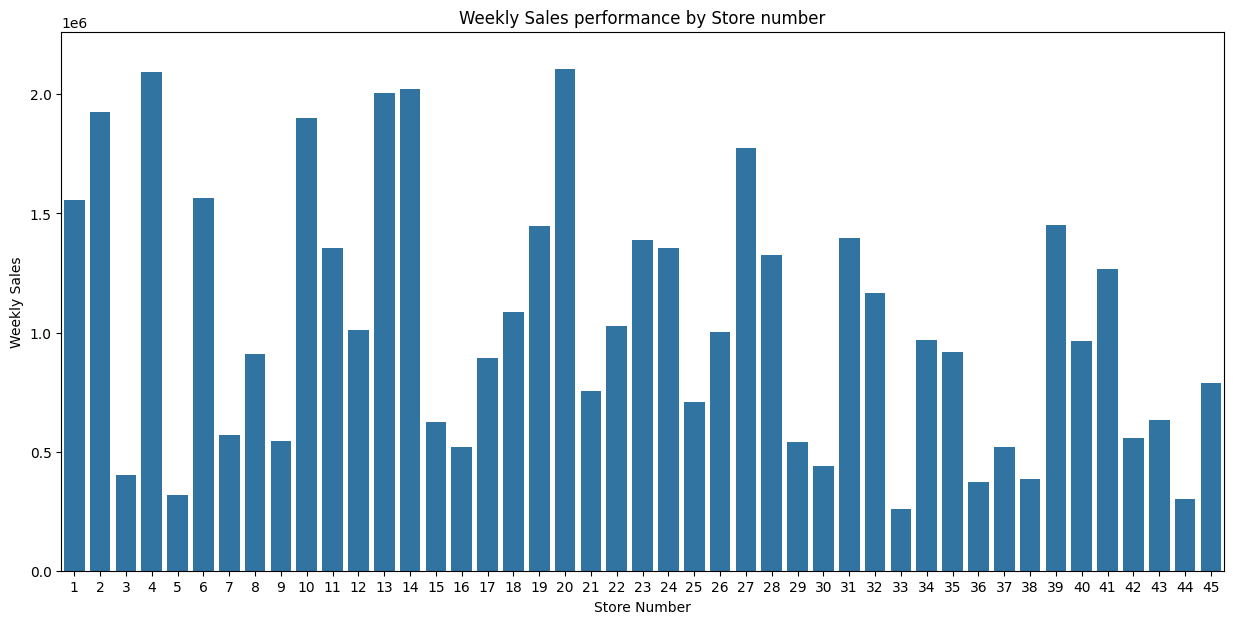

In [18]:
# Set the plot size
plt.figure(figsize=(15,7))

# Plot the bar chart
sns.barplot(data=df, x='Store', y='Weekly_Sales', hue=None, errwidth=0, width=0.8)

# Specify the 'Title', 'x', and 'y' axis of the chart
plt.title('Weekly Sales performance by Store number')
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales')

# Show plot
plt.show()

### Correlation Matrix to see which variables have a correlation(negative/positive) with the Weekly_Sales.

* Analysis:

    1. There is a positive correlation between the Weekly Sales and Month columns with correlation value of 0.068 which shows that Weekly Sales is affected in certain months.

    2. There is a positive correlation between the Weekly Sales and Date columns with correlation value of 0.0046 which shows that the Date affect Weekly Sales but I'd focus on Month of the Year since it has been extracted from it and has a higher correlation value.

    3. There is a positive correlation between the Weekly Sales and Holiday Flag columns with correlation value of 0.037 which shows that holidays affect weekly sales.

    4. The other positive correlation is between Weekly_sales and Fuel_Price columns with a very weak correlation value of 0.0092 which shows that fuel Price affects weekly sales even though not as strong as the other variables like Month and Holiday Flag. 
    
    5. The rest of the variables are negatively correlated with Weekly_sales and are of no interest to us in this analysis.

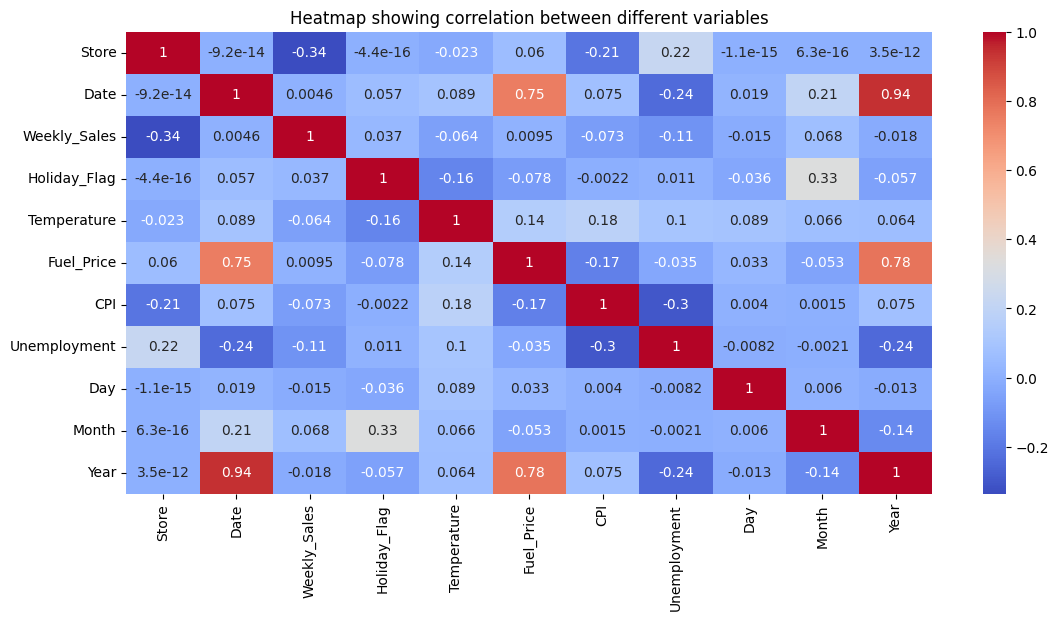

In [19]:
# Set the plot size
plt.figure(figsize=(13,6))

# Plot the heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# add title to plot
plt.title('Heatmap showing correlation between different variables')

# show plot
plt.show()

### Scatter Plot of Weekly Sales VS Month 

* Analysis

    1. The scatterplot gives a graphical perspective of how positively correlated the Weekly Sales is to the Month.
    
    2. At a glance you can see that Q4 (October - December) Weekly Sales usually experiences a surge.

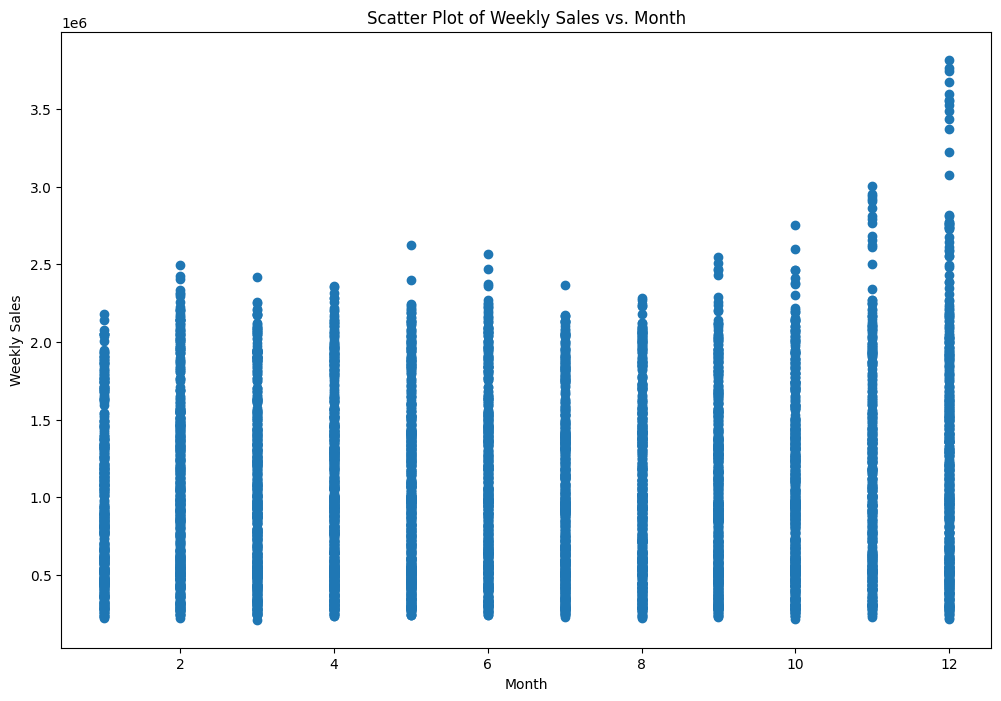

In [20]:
# Set figure size
plt.figure(figsize=(12,8))

# Scatter Plot of Weekly Sales VS Month columns
plt.scatter(df['Month'], df['Weekly_Sales'])
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Weekly Sales vs. Month')

# Show plot
plt.show()

### Scatter Plot of Weekly Sales VS Holiday Flag

* Analysis

    1. The scatterplot gives a graphical representation of how positively correlated the Weekly Sales is to the Holiday Flag.
    
    2. From the scatter plot, we can infer that Walmart experiences more Weekly Sales during Non-Holidays(0) than during Holidays(1).

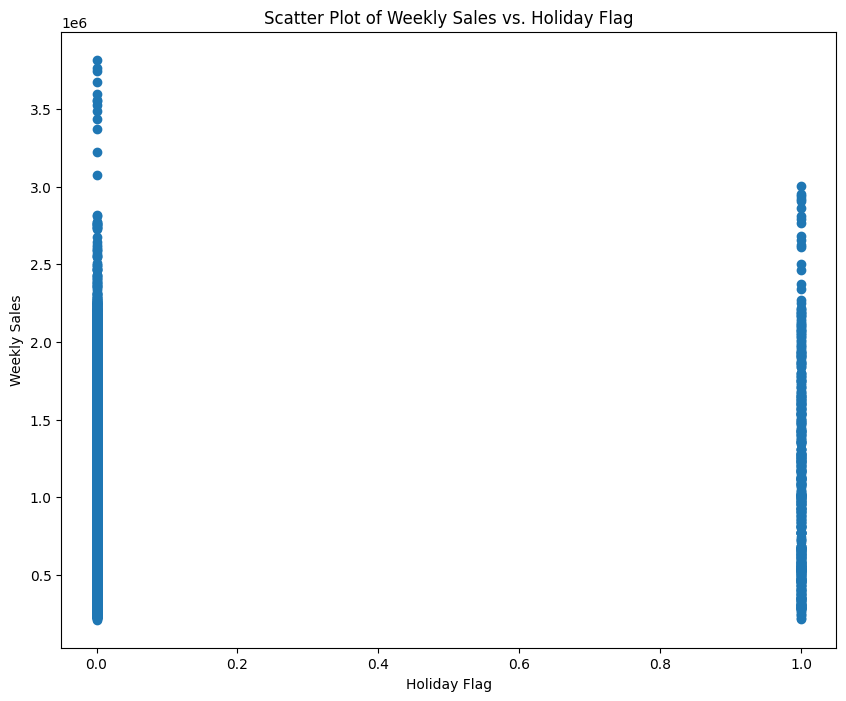

In [21]:
# Set figure size
plt.figure(figsize=(10,8))

# Scatter Plot of Weekly Sales VS Holiday Flag columns
plt.scatter(df['Holiday_Flag'], df['Weekly_Sales'])
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Weekly Sales vs. Holiday Flag')

# Show Plot
plt.show()

### Scatter Plot of Weekly Sales VS Fuel Price

* Analysis

    1. The scatter plot gives a graphical view of the correlation between Weekly Sales and Fuel Price.
    
    2. Graphically with the scatter plot, the Fuel Price shows a very weak positive correlation with Weekly sales.

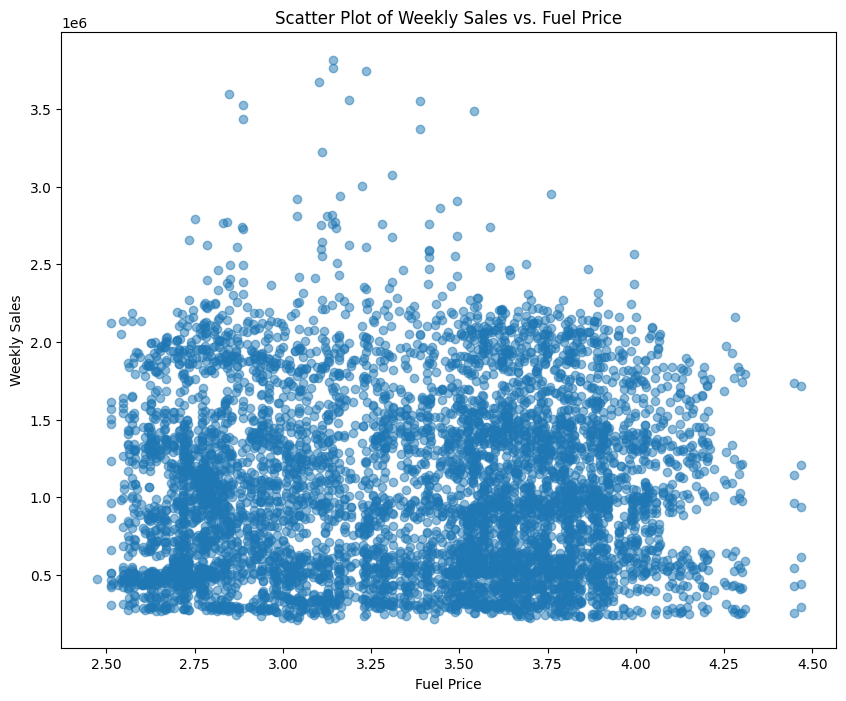

In [22]:
# Scatter Plot of Weekly Sales VS Fuel Price columns

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.5)
ax.set_xlabel('Fuel Price')
ax.set_ylabel('Weekly Sales')
ax.set_title('Scatter Plot of Weekly Sales vs. Fuel Price')
plt.show()

### Findings

1. Store Number '20' has the highest Weekly Sales across all 45 Walmart Stores.

2. Store Number '33' has the lowest Weekly Sales across all 45 Walmart Stores.

3. The Stores experience more Weekly Sales when it is a non holiday week (0). 

4. Q4 (October - December) Weekly Sales increases are experienced across all stores.


### Recommendations

1. Increase inventories during the Q4 - fourth quarter to match the increasing sales.

2. Increase Inventories on days that are marked as non-holiday weeks as compared to holiday weeks. 